# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

In [3]:
class MSELoss(BaseLoss):

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray):
        l = X.shape[0]
        y_pred = X @ w
        error = y_pred - y
        return (1 / l) * np.dot(error, error)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray):
        l = X.shape[0]
        return (2 / l) * X.T @ (X @ w - y)

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        l = X.shape[0]
        error = X @ w - y
        return (1/l) * np.dot(error, error)
        # -- YOUR CODE HERE -- ( ⚆ ω ⚆)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l = X.shape[0]
        return (2/l) * X.T @ (X @ w-y)
        # -- YOUR CODE HERE -- =^･ω･^=
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [6]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- (ﾉ´ з `)ノ
    w = w_init.copy()
    trajectory =[w.copy()]

    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w-lr * grad
        trajectory.append(w.copy())

    return trajectory

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

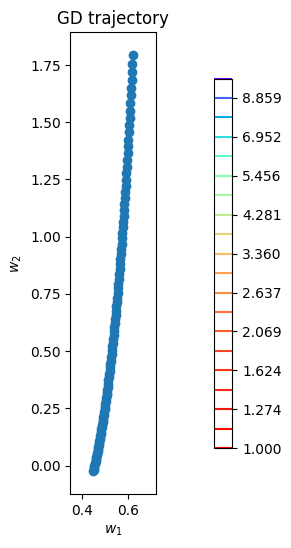

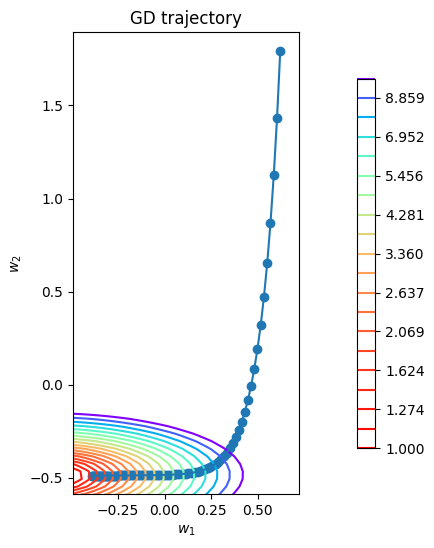

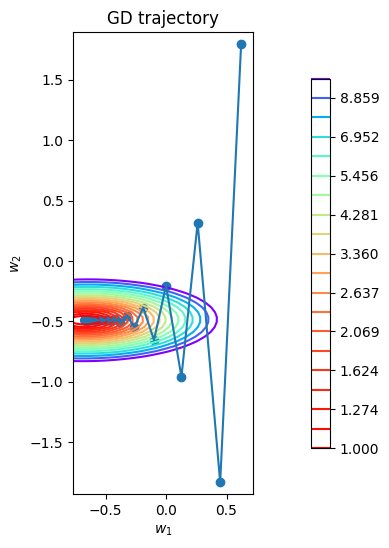

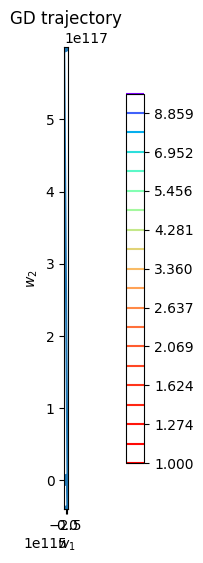

In [10]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶
learning_rates = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rates:
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    plot_gd(w_list, X, y, loss)

вывод: маленький lr (0.0001): градиентный спуск будет двигаться очень медленно, траектория будет плавной, но потребуется много итераций, чтобы заметно улучшить результат

умеренный lr (0.001 или 0.01): эти значения шага будут сбалансированными, градиентный спуск будет достаточно быстро сходиться, следуя контурным линиям функции потерь и при этом не выходя за пределы оптимального решения

большой lr (0.1): градиентный спуск может стать нестабильным, траектория может перепрыгивать через минимумы, так как шаги будут слишком большими, что приведет к перепрыгиванию через оптимальное значение. В худшем случае алгоритм может вообще не сходиться

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    trajectory =[w.copy()]
    n_objects = X.shape[0]

    for _ in range(n_iterations):
        batch_indices = np.random.choice(n_objects, size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        w = w-lr * grad
        trajectory.append(w.copy())
    return trajectory
    # -- YOUR CODE HERE -- (＠_＠)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

0.0001 1
425.58917680450253
36.070848726674285


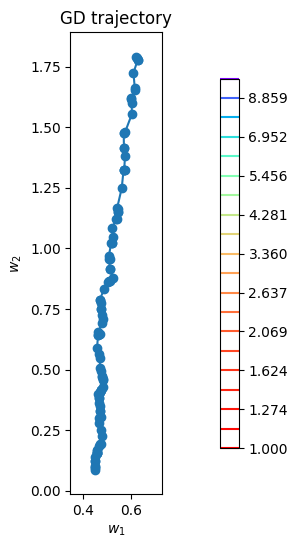

0.0001 10
425.58917680450253
26.86940080636639


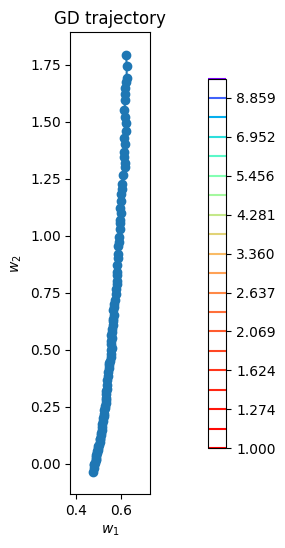

0.0001 50
425.58917680450253
27.121410121624432


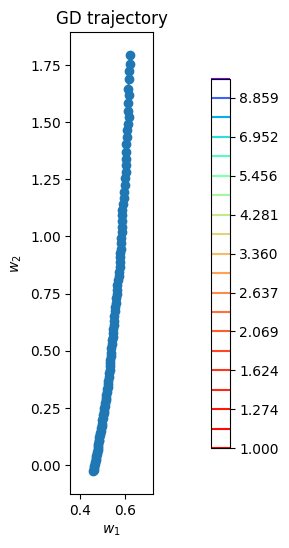

0.0001 150
425.58917680450253
26.613201788202378


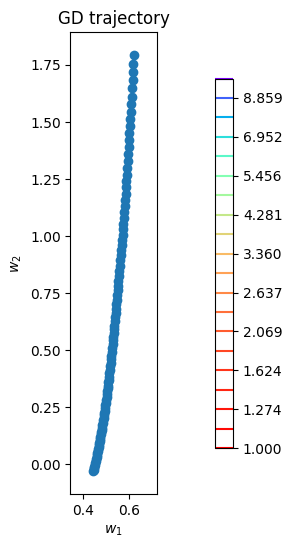

0.001 1
425.58917680450253
1.0863787163524392


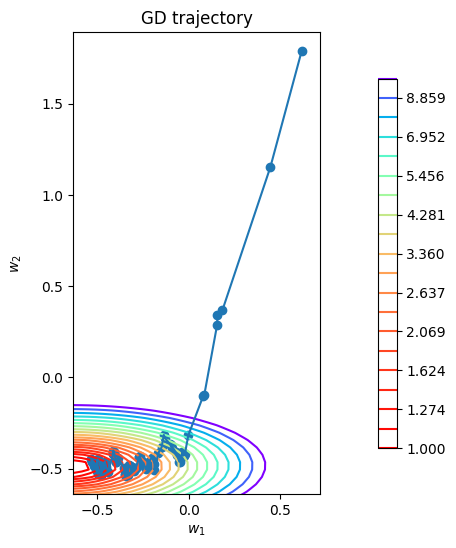

0.001 10
425.58917680450253
1.3850602547986337


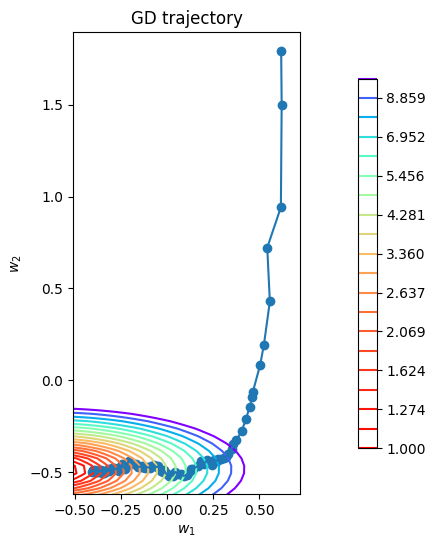

0.001 50
425.58917680450253
1.4922655910709604


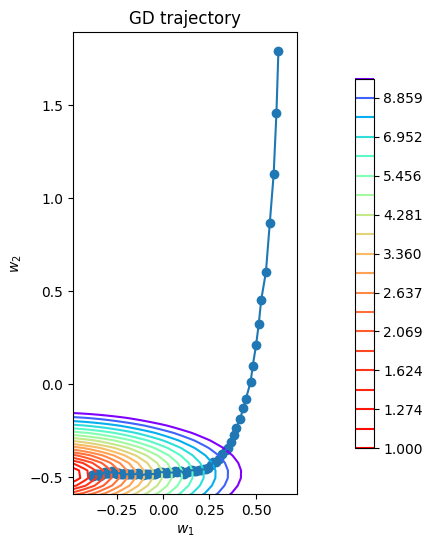

0.001 150
425.58917680450253
1.457893619567126


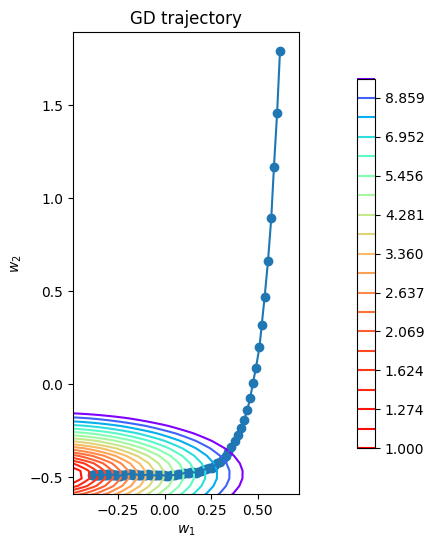

0.01 1
425.58917680450253
5.3691853435043955


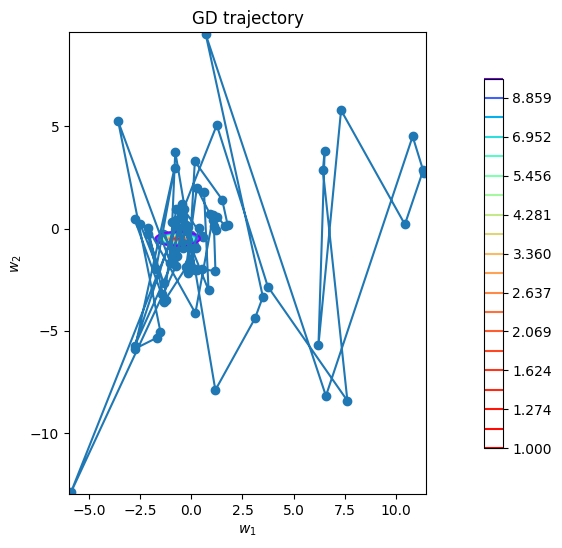

0.01 10
425.58917680450253
0.9851161546594819


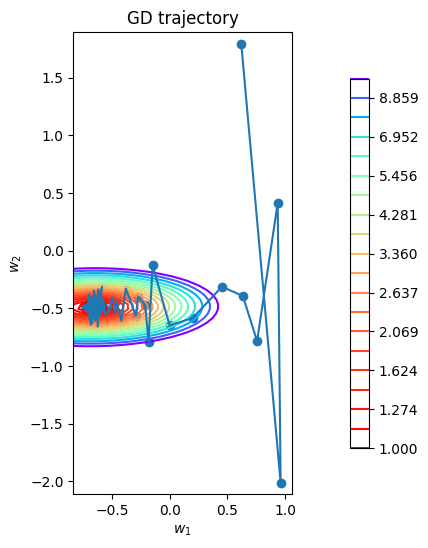

0.01 50
425.58917680450253
0.9557973032992669


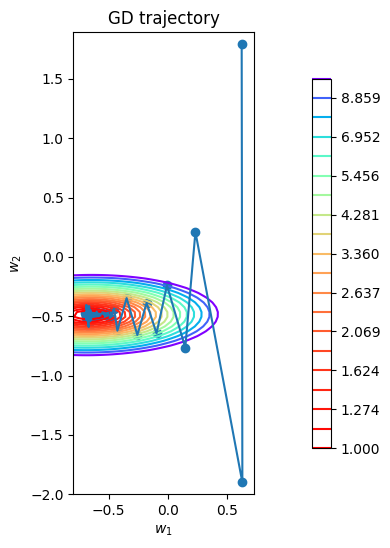

0.01 150
425.58917680450253
0.8752883925321943


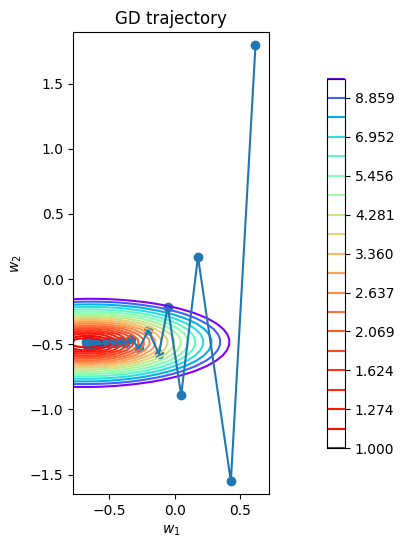

0.1 1
425.58917680450253
3.843091004806308e+169


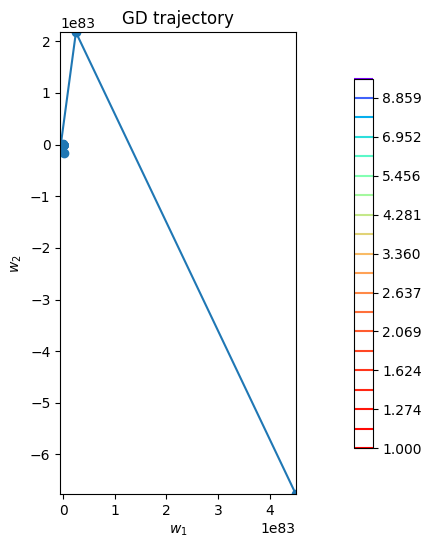

0.1 10
425.58917680450253
5.783123262938242e+235


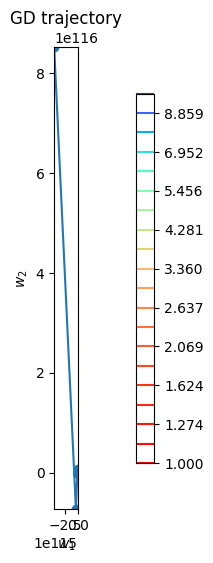

0.1 50
425.58917680450253
2.5867425561182913e+236


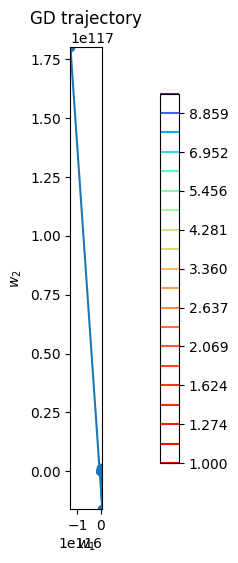

0.1 150
425.58917680450253
1.629359812027377e+237


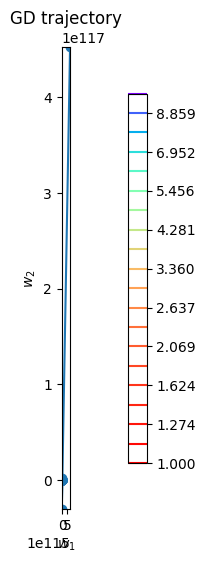

In [12]:
# -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [1, 10, 50, 150]

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(lr,batch_size)
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100)
        print(loss.calc_loss(X, y, w_list[0]))
        print(loss.calc_loss(X, y, w_list[-1]))
        plot_gd(w_list, X, y, loss)

влияние lr:
маленький lr (0.0001) — SGD сходится очень медленно, особенно при маленьких batch_size

оптимальный lr (0.001 – 0.01) — позволяет уверенно двигаться к минимуму, особенно при средних значениях batch_size

слишком большой lr (0.1) — может вызвать скачки и раскачку градиентного спуска, особенно при маленьких batch_size, где шум сильнее

Влияние batch_size:
малый batch_size (1, 10): очень шумная траектория — веса прыгают, но часто в нужном направлении.такой подход быстро делает шаги, но может долго метаться около минимума. подходит для очень больших датасетов или онлайн-обучения

Средний batch_size (50): компромисс между стабильностью и скоростью. траектория становится более гладкой, чем при размере 1, и сходимость хорошая

большой batch_size (150 и выше): ближе к обычному градиентному спуску (если взять весь датасет), траектория становится гладкой, почти как при полном градиенте. снижает шум, но делает обновления менее частыми (дороже по вычислениям на итерацию)

Отличие от обычного градиентного спуска:
SGD обновляет веса чаще (на каждом батче), что делает его более чувствительным к выбору lr и размера батча; полный градиентный спуск стабилен, но может быть медленным при большом объёме данных; визуально SGD выглядит как скачущая траектория, а обычный — как плавная и аккуратная

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    # -- YOUR CODE HERE -- ¯\_(ツ)_/¯
    w = w_init.copy()
    trajectory = [w.copy()]
    n_objects = X.shape[0]
    s0 = 1

    for t in range(1, n_iterations + 1):
        batch_indices = np.random.choice(n_objects, size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        eta_t = lr*(s0/(s0 + t))**p
        w = w - eta_t * grad
        trajectory.append(w.copy())

    return trajectory

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

р =  0.1
425.58917680450253
0.8796985881447503


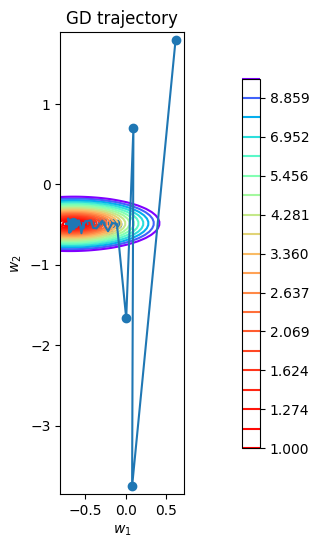

р =  0.3
425.58917680450253
0.8800390667875333


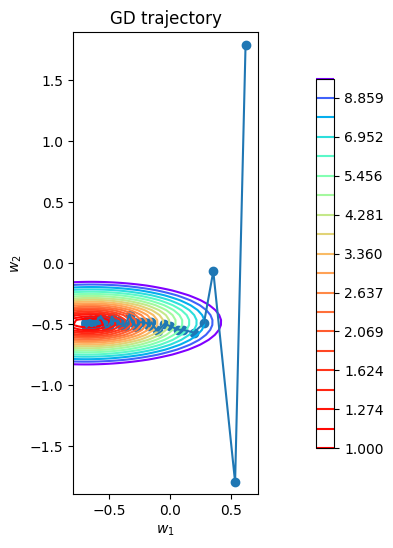

р =  0.5
425.58917680450253
0.9199220060588018


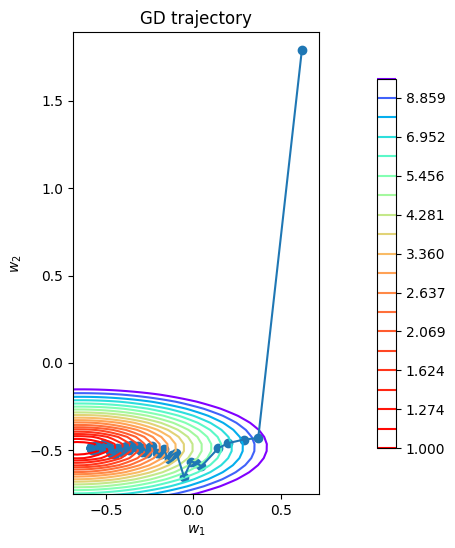

р =  0.8
425.58917680450253
2.346233008180449


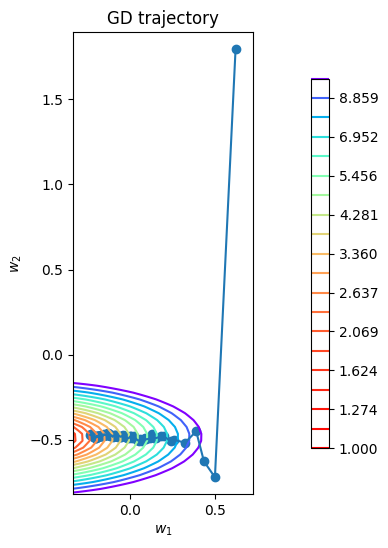

In [14]:
# -- YOUR CODE HERE -- [✖‿✖]
lr = 0.01
batch_size = 10
p_values = [0.1, 0.3, 0.5, 0.8]
for p in p_values:
    print("р = ", p)
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 100)
    print(loss.calc_loss(X, y, w_list[0]))
    print(loss.calc_loss(X, y, w_list[-1]))
    plot_gd(w_list, X, y, loss)


при малом p (близкие к 0): шаг обучения быстро уменьшается, что может привести к тому, что модель не успеет хорошо сойтись к минимуму, процесс обучения быстрый, но неэффективны

при среднем значении p (около 0.5-0.7): плавное уменьшение шага, модель постепенно сходится к минимуму с хорошим балансом между скоростью и точностью

при больших значениях p (больше 1): шаг уменьшается медленно, что может привести к переобучению и нестабильности, так как модель продолжает делать большие шаги даже на поздних этапах

Для малых значений p мы, скорее всего, увидим быстрый спад значения функции потерь, но в какой-то момент алгоритм может застрять и не достичь хороших результатов. для средних значений p ожидается более сбалансированное поведение с хорошей сходимость. для больших значений p возможен медленный процесс обучения и переобучение, когда модель будет слишком долго двигаться к минимуму

выод: средние значения p обычно обеспечивают оптимальный баланс между сходимостью и точностью



**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

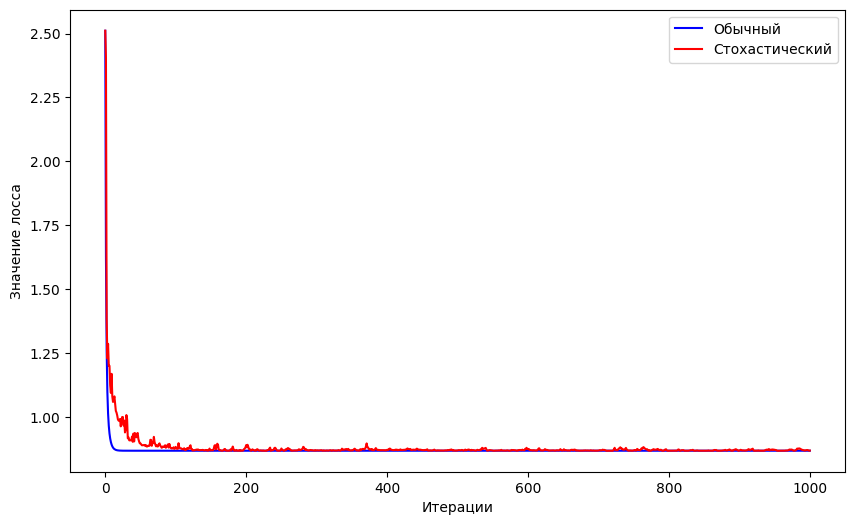

In [16]:
import matplotlib.pyplot as plt
lr = 0.01
batch_size = 10
n_iterations = 1000
p = 0.5
w_init = np.random.uniform(-2, 2, (n_features,))
loss_bgd = MSELoss()
w_bgd_list = gradient_descent(w_init, X, y, loss_bgd, lr, n_iterations)
loss_bgd_values = [loss_bgd.calc_loss(X, y, w) for w in w_bgd_list]
loss_sgd = MSELoss()
w_sgd_list = stochastic_gradient_descent(w_init, X, y, loss_sgd, lr, batch_size, p, n_iterations)
loss_sgd_values = [loss_sgd.calc_loss(X, y, w) for w in w_sgd_list]
min_iterations = min(len(loss_bgd_values), len(loss_sgd_values))
plt.figure(figsize=(10, 6))
plt.plot(range(min_iterations), loss_bgd_values[:min_iterations], label="Обычный", color='blue')
plt.plot(range(min_iterations), loss_sgd_values[:min_iterations], label="Стохастический", color='red')
plt.xlabel("Итерации")
plt.ylabel("Значение лосса")
plt.legend()
plt.show()



Обычный градиентный спуск будет показывать более плавное снижение значения лосса, так как на каждой итерации учитываются все данные, он медленно сходится и требует больше времени для достижения оптимума. а стохастический градиентный спуск будет демонстрировать более шумное поведение, так как на каждой итерации используется случайная подвыборка данных, это может приводить к быстрым скачкам и изменениям в лоссе, но он будет работать быстрее, так как обновление весов происходит чаще (на каждой итерации)

Преимущество SGD в том, что он может быстрее достигать хороших решений, особенно при больших данных, так как он обновляет веса на каждом шаге, но при этом из-за шума, его сходимость может быть менее стабильной по сравнению с обычным градиентным спуском

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [17]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-0.5, 0.5, size=X.shape[1])
        trajectory = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = trajectory[-1]
        # -- YOUR CODE HERE -- ʕ•ᴥ•ʔ

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_pred = X @ self.w
        return y_pred
        # -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

In [ ]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [24]:
# -- YOUR CODE HERE -- =^･ω･^=
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_raw = pd.read_csv("cars_data.csv", header=None,na_values=["?"], skiprows=1, index_col=0)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)
X_raw.columns = range(X_raw.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns
numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [25]:
# -- YOUR CODE HERE -- (ﾉ´ з `)ノ
model = LinearRegression(MSELoss(), lr=0.1)
model.fit(X_train_processed, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [30]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train_processed)
y_test_pred = model.predict(X_test_processed)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(mse_train)
print(mse_test)
# -- YOUR CODE HERE -- ( ⚆ ω ⚆)

1393172.3919994675
10651166.690387473


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [31]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        y_pred = X @ w
        error =y_pred - y
        mse_loss = (error** 2).mean()
        w_wo_bias = w[:-1]
        reg_loss = self.coef * np.sum(w_wo_bias ** 2)

        return mse_loss + reg_loss
        # -- YOUR CODE HERE -- (´｡• ᵕ •｡`)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_samples = X.shape[0]
        y_pred = X @ w
        error = y_pred - y
        grad_mse = (2/n_samples) * (X.T @ error)
        reg_grad = 2*self.coef * w
        reg_grad[-1] =0
        return grad_mse + reg_grad
        # -- YOUR CODE HERE -- (￢_￢)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [34]:
# -- YOUR CODE HERE -- (＠_＠)
from sklearn.metrics import mean_squared_error
lambda_values = [0.001, 0.01, 0.1, 1]
best_lambda, best_mse = None, float('inf')
for lambda_value in lambda_values:
    model =  LinearRegression(MSEL2Loss(coef=lambda_value))
    model.fit(X_train_processed, y_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train_processed))
    mse_test = mean_squared_error(y_test, model.predict(X_test_processed))
    if mse_test < best_mse:
        best_lambda,best_mse = lambda_value, mse_test

model_no_reg = LinearRegression(MSELoss())
model_no_reg.fit(X_train_processed, y_train)
mse_train_no_reg = mean_squared_error(y_train, model_no_reg.predict(X_train_processed))
mse_test_no_reg =mean_squared_error(y_test, model_no_reg.predict(X_test_processed))
print(mse_train_no_reg,mse_test_no_reg)
print(best_lambda,best_mse)

1393172.391999463 10651160.313892787
0.001 8731360.46579241


Оптимальный баланс достигается при маленьком 𝜆 (0,001), это помогает немного снизить переобучение без потери качества на трейне

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [36]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        y_pred = X @w
        error = y_pred - y
        abs_error = np.abs(error)
        squared_loss = 0.5 * (error ** 2)
        linear_loss = self.eps * (abs_error - 0.5* self.eps)
        loss = np.where(abs_error <= self.eps, squared_loss,linear_loss)
        return np.mean(loss)
        # -- YOUR CODE HERE -- (っ˘ڡ˘ς)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X @ w
        error= y_pred - y
        abs_error = np.abs(error)
        grad_error = np.where(abs_error <= self.eps, error, self.eps * np.sign(error))
        grad = (1 /X.shape[0]) * (X.T @ grad_error)
        return grad
        # -- YOUR CODE HERE -- ٩(ˊ〇ˋ*)و
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [37]:
# -- YOUR CODE HERE -- # (⌐■_■)
model_huber = LinearRegression(HuberLoss(eps=1.0))
model_huber.fit(X_train_processed, y_train)
mse_train_huber = mean_squared_error(y_train, model_huber.predict(X_train_processed))
mse_test_huber = mean_squared_error(y_test, model_huber.predict(X_test_processed))
print(mse_train_huber)
print(mse_test_huber)

10153270.991912479
48824330.51341206


с MSELoss: тренировочная:1393172.391999463, тестовая: 10651160.313892787

с HuberLoss: тренировочная: 10153270.991912479, тестовая: 48824330.51341206

и на обучении и на тренировочной выборке модель с HuberLoss ошибается намного больше, чем модель с MSELoss, это может говорить о том, что при выбранном eps HuberLoss работает хуже, чем MSELoss, скорее всего он недообучился, слишком мягко реагировал на ошибки, думаю если уменьшить eps, то HuberLoss покажет себя лучше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE -- ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

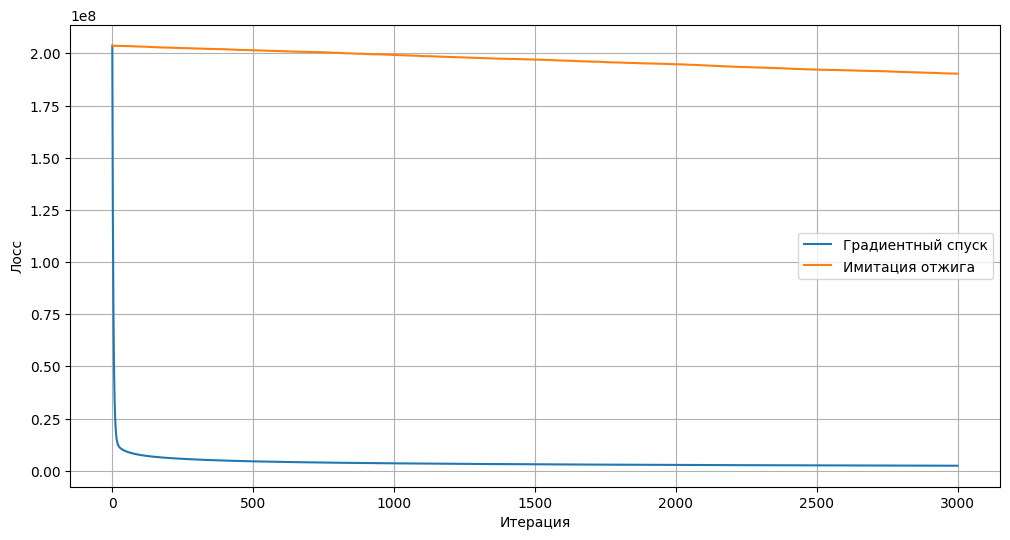

градиентный спуск: 2405197.2498038015
имитация отжига: 190332511.6411488


In [41]:
# -- YOUR CODE HERE -- ʕ•ᴥ•ʔ
class MSELoss:
    def calc_loss(self, X, y, w):
        error = X @ w - y
        return np.mean(error ** 2)
    def calc_grad(self, X, y, w):
        n_samples = X.shape[0]
        error = X @ w - y
        return (2/n_samples) * (X.T @ error)

def sim_ann(X, y, loss_fn, n_iters=1000,start_temp=1.0,temp_decay=0.99):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    current_loss = loss_fn.calc_loss(X, y, w)
    losses = [current_loss]
    temp = start_temp
    for i in range(n_iters):
        new_w = w + np.random.standard_t(3, size=w.shape) * 0.1
        new_loss = loss_fn.calc_loss(X, y, new_w)
        if new_loss < current_loss or np.random.rand() < np.exp((current_loss - new_loss) / temp):
            w = new_w
            current_loss = new_loss
        losses.append(current_loss)
        temp *= temp_decay
    return w, losses
X_train_b = np.hstack([X_train_processed,np.ones((X_train_processed.shape[0],1))])
mse_loss = MSELoss()
w_sa, losses_sa =sim_ann(X_train_b, y_train.to_numpy(), mse_loss, n_iters=3000, start_temp=10.0, temp_decay=0.995)

def gradient_descent(X, y, loss_fn, n_iters=3000, lr=0.01):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(n_iters):
        loss = loss_fn.calc_loss(X, y, w)
        grad = loss_fn.calc_grad(X, y, w)
        w -= lr * grad
        losses.append(loss)
    return w,losses
w_gd, losses_gd = gradient_descent(X_train_b, y_train.to_numpy(), mse_loss, n_iters=3000, lr=0.01)
plt.figure(figsize=(12, 6))
plt.plot(losses_gd, label='Градиентный спуск')
plt.plot(losses_sa, label='Имитация отжига')
plt.xlabel('Итерация')
plt.ylabel('Лосс')
plt.legend()
plt.grid()
plt.show()
print("градиентный спуск:", losses_gd[-1])
print("имитация отжига:", losses_sa[-1])


 ну градиентный спуск здесь явно работает быстрее и эффективнее, поскольку он напрямую использует информацию о градиенте функции потерь, а имитация отжига сильно хуже себя тут показала, скорее всего, из-за настроек алгоритма, которые можно улучшить (мне лень 🙃), этот метод требует более тщательной настройки гиперпараметров, таких как начальная температура и скорость охлаждения